In [ ]:
pip install python_speech_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import pywt
import csv
import os
from glob import glob
import shutil
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Data Tugas Akhir"
N_path = f'{base_path}{os.sep}Normal/'
audio_files_N = glob(N_path  + '*.wav')
Preprocess_N = f'{base_path}{os.sep}Preprocess_Normal/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**MFCC**

In [ ]:
def feature_extraction(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_best')
    mfcc = librosa.feature.mfcc(y=x, sr = sample_rate)
    return mfcc

In [ ]:
features = {}
features_mfcc_test = []
directory = Preprocess_N
for audio in os.listdir(directory):
    audio_path = directory+audio
    features[audio_path] = feature_extraction(audio_path)
    features_mfcc_test.append(feature_extraction(audio_path))

In [ ]:
features_mfcc_test

[array([[-9.1429871e+02, -9.7428247e+02, -1.0779447e+03, ...,
         -1.0837161e+03, -1.0834346e+03, -1.0920490e+03],
        [ 8.1823227e+01,  7.6548035e+01,  3.8741539e+01, ...,
          3.9240623e+01,  3.9570992e+01,  3.0365337e+01],
        [-4.6861477e+01, -4.1731590e+01,  2.0857854e+00, ...,
          1.1952318e+01,  1.2001467e+01,  9.8858805e+00],
        ...,
        [ 2.5595403e+00,  2.1109159e+00, -1.7468898e+00, ...,
         -1.0288090e+01, -7.7938890e+00, -5.8218050e+00],
        [-2.8010406e+00, -3.1460333e+00, -9.9523258e+00, ...,
         -9.6060667e+00, -5.6050377e+00, -4.1276779e+00],
        [-1.1207814e+00, -2.3089628e+00, -1.2156707e+01, ...,
         -3.8072095e+00, -1.8409133e-01, -4.5945522e-01]], dtype=float32),
 array([[-9.04807129e+02, -9.53649170e+02, -1.03596045e+03, ...,
         -1.04859692e+03, -1.04848816e+03, -1.04566577e+03],
        [ 8.82893677e+01,  7.32578125e+01,  1.36866760e+01, ...,
          3.55537399e-03,  5.71312048e-02,  1.96659303e+00]

In [ ]:
features

{'/content/drive/MyDrive/Data Tugas Akhir/Preprocess_Normal/Preprocessed_N_1.wav': array([[-9.1429871e+02, -9.7428247e+02, -1.0779447e+03, ...,
         -1.0837161e+03, -1.0834346e+03, -1.0920490e+03],
        [ 8.1823227e+01,  7.6548035e+01,  3.8741539e+01, ...,
          3.9240623e+01,  3.9570992e+01,  3.0365337e+01],
        [-4.6861477e+01, -4.1731590e+01,  2.0857854e+00, ...,
          1.1952318e+01,  1.2001467e+01,  9.8858805e+00],
        ...,
        [ 2.5595403e+00,  2.1109159e+00, -1.7468898e+00, ...,
         -1.0288090e+01, -7.7938890e+00, -5.8218050e+00],
        [-2.8010406e+00, -3.1460333e+00, -9.9523258e+00, ...,
         -9.6060667e+00, -5.6050377e+00, -4.1276779e+00],
        [-1.1207814e+00, -2.3089628e+00, -1.2156707e+01, ...,
         -3.8072095e+00, -1.8409133e-01, -4.5945522e-01]], dtype=float32),
 '/content/drive/MyDrive/Data Tugas Akhir/Preprocess_Normal/Preprocessed_N_2.wav': array([[-9.04807129e+02, -9.53649170e+02, -1.03596045e+03, ...,
         -1.04859692e

MFCC **MEAN**

In [ ]:
mfcc_means = []
for i in features_mfcc_test:
  mean = np.mean(i)
  mfcc_means.append(mean)

Text(0.5, 0, 'Data Ke')

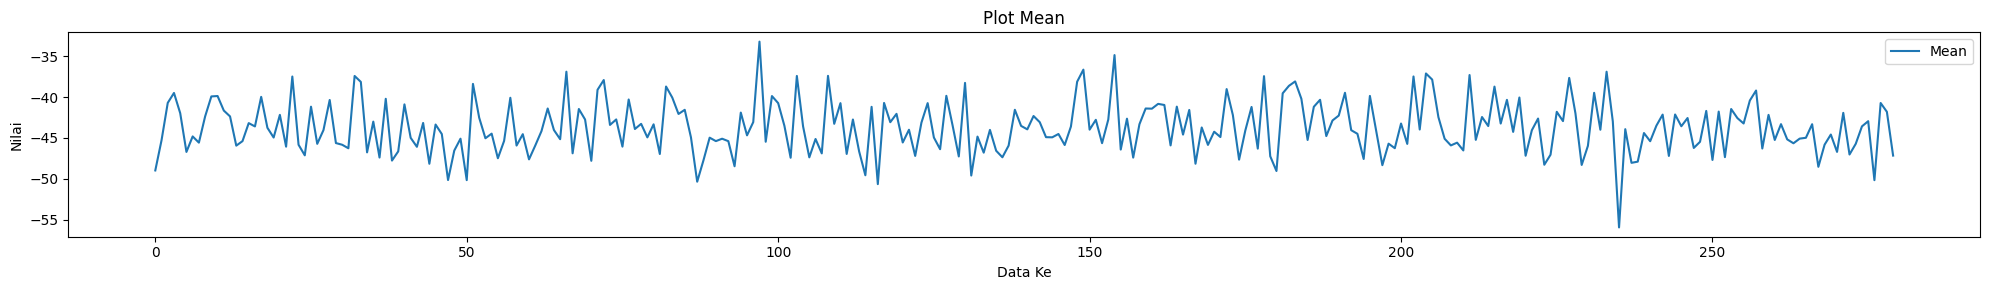

In [ ]:
df_mean = pd.DataFrame(mfcc_means, columns=['Mean'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_mean.plot.line()

plt.title('Plot Mean')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_std = []
for i in features_mfcc_test:
  std = np.std(i)
  mfcc_std.append(std)

Text(0.5, 0, 'Data Ke')

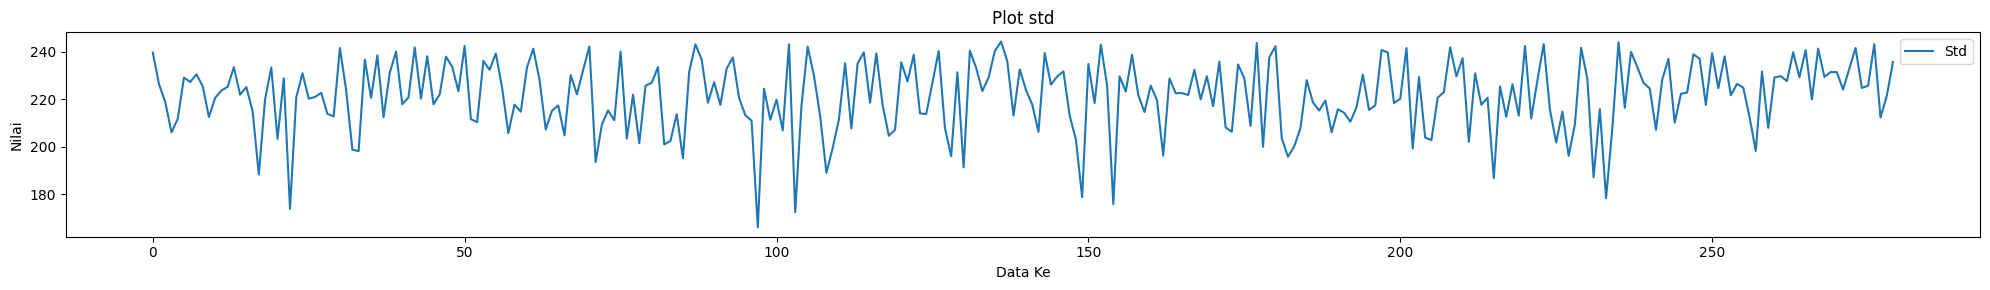

In [ ]:
df_std = pd.DataFrame(mfcc_std, columns=['Std'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_std.plot.line()

plt.title('Plot std')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
MFCC_max = []
for i in features_mfcc_test:
  max = np.max(i)
  MFCC_max.append(max)

Text(0.5, 0, 'Data Ke')

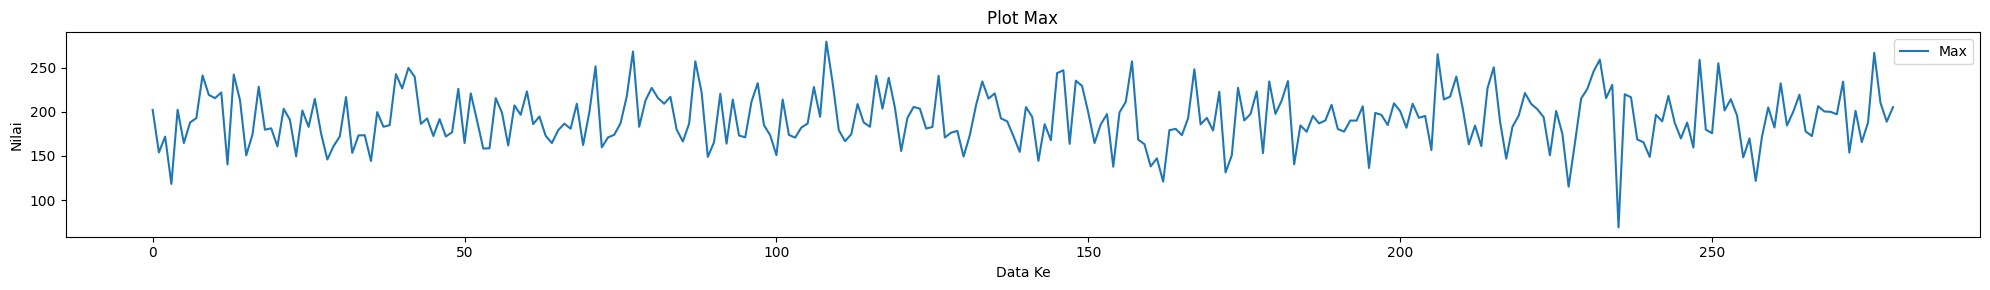

In [ ]:
df_max = pd.DataFrame(MFCC_max, columns=['Max'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_max.plot.line()

plt.title('Plot Max')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Min = []
for i in features_mfcc_test:
  Min = np.min(i)
  mfcc_Min.append(Min)

Text(0.5, 0, 'Data Ke')

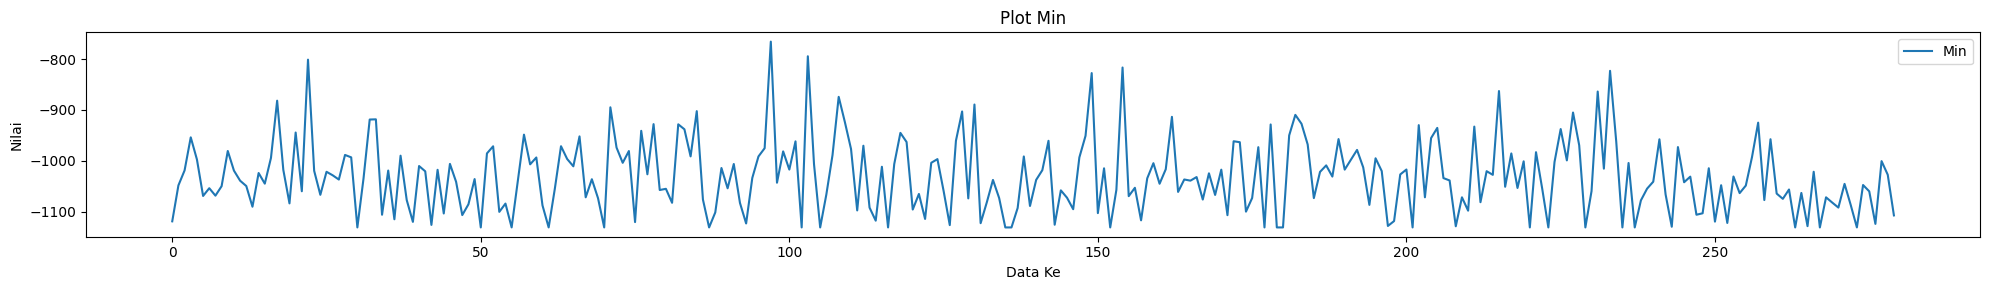

In [ ]:
df_min = pd.DataFrame(mfcc_Min, columns=['Min'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_min.plot.line()

plt.title('Plot Min')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Med = []
for i in features_mfcc_test:
  Med = np.median(i)
  mfcc_Med.append(Med)

Text(0.5, 0, 'Data Ke')

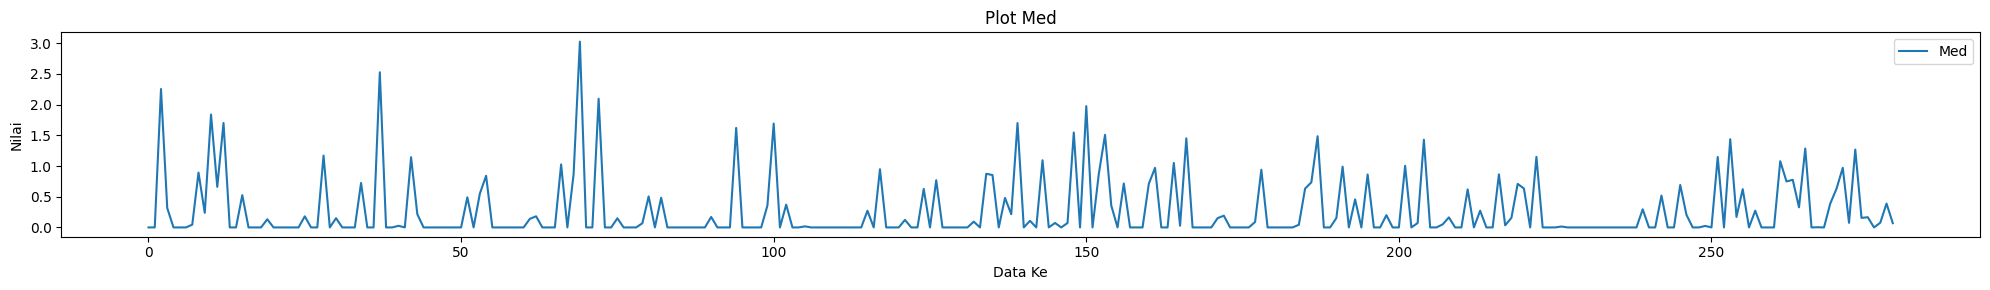

In [ ]:
df_med = pd.DataFrame(mfcc_Med, columns=['Med'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_med.plot.line()

plt.title('Plot Med')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Var = []
for i in features_mfcc_test:
  Var = np.var(i)
  mfcc_Var.append(Var)

Text(0.5, 0, 'Data Ke')

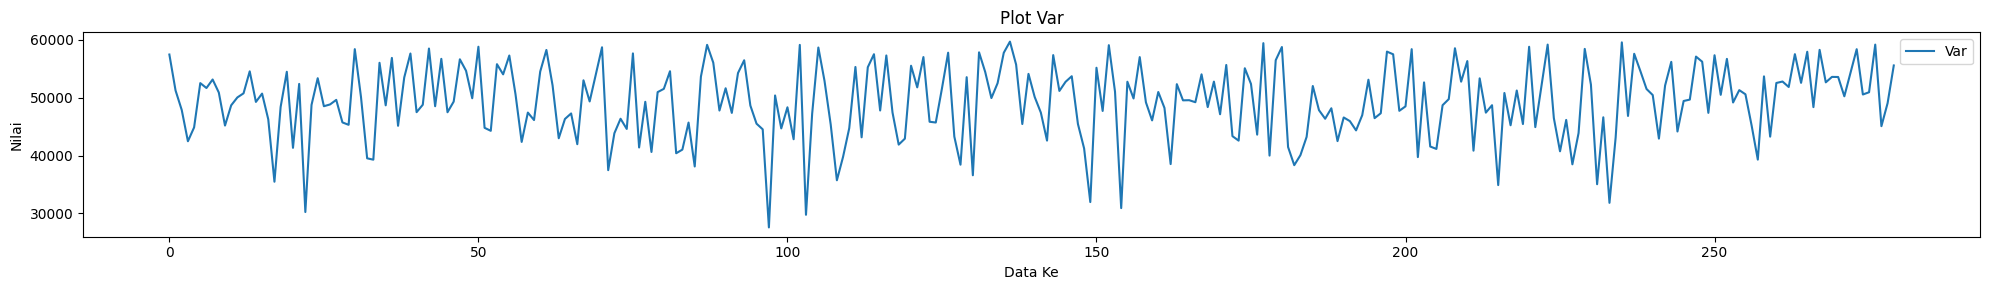

In [ ]:
df_var = pd.DataFrame(mfcc_Var, columns=['Var'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_var.plot.line()

plt.title('Plot Var')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import skew

In [ ]:
mfcc_Skew = []
for i in features_mfcc_test:
  Skew = skew(i, axis=0, bias=True)
  mfcc_Skew.append(Skew)

In [ ]:
skew_means = []
for i in mfcc_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

Text(0.5, 0, 'Data Ke')

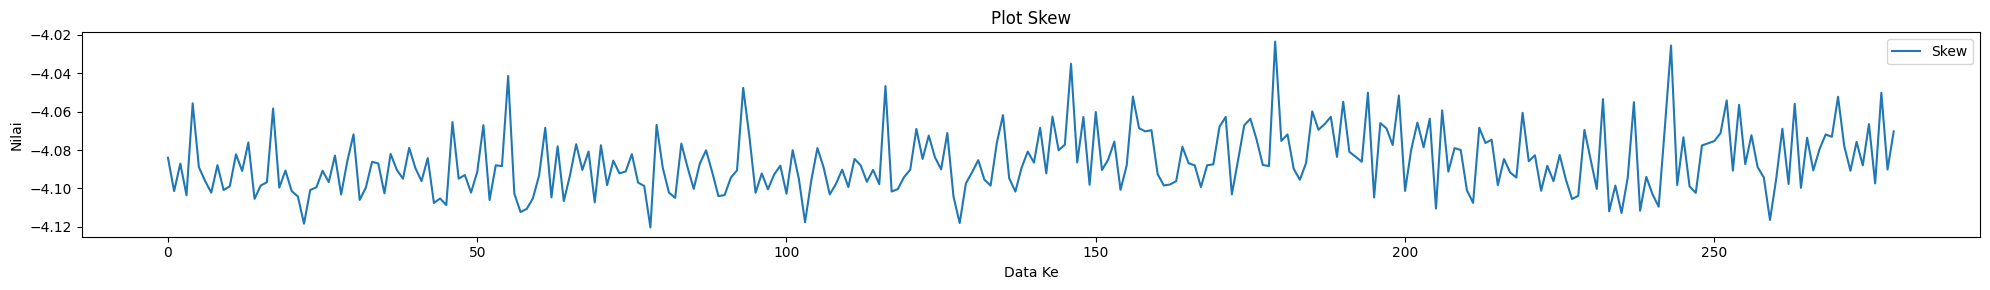

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Skew'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_skew.plot.line()

plt.title('Plot Skew')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q1 = []
for i in features_mfcc_test:
  Q1 = np.percentile(i, 25)
  mfcc_Q1.append(Q1)

Text(0.5, 0, 'Data Ke')

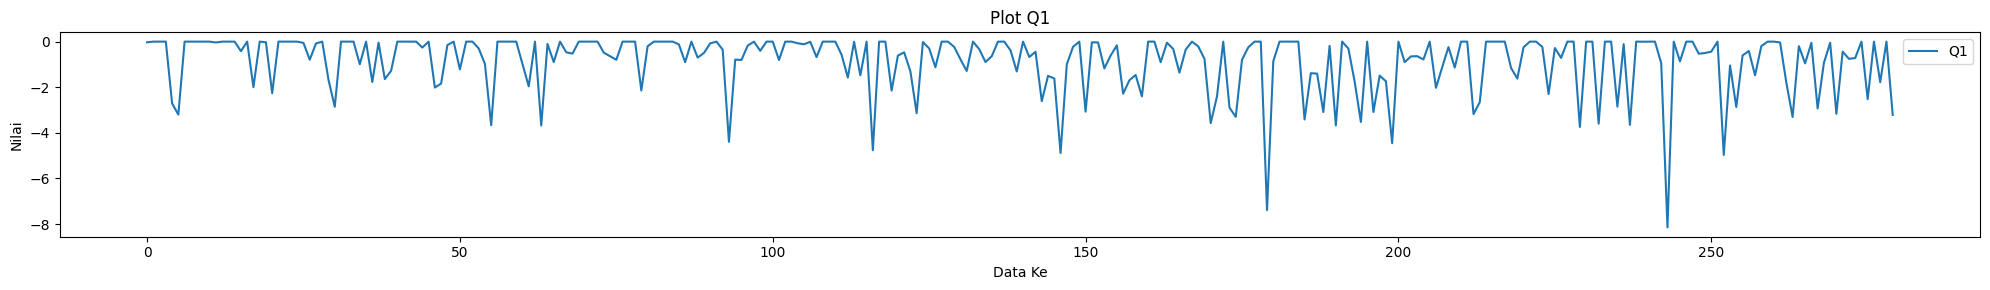

In [ ]:
df_q1 = pd.DataFrame(mfcc_Q1, columns=['Q1'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q1.plot.line()

plt.title('Plot Q1')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_Q3 = []
for i in features_mfcc_test:
  Q3 = np.percentile(i, 75)
  mfcc_Q3.append(Q3)

Text(0.5, 0, 'Data Ke')

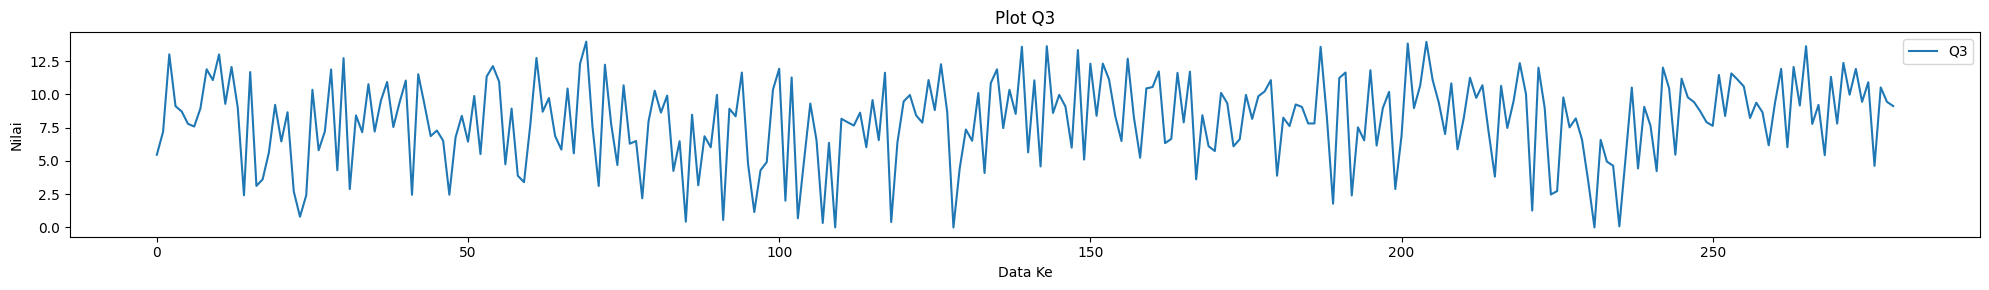

In [ ]:
df_q3 = pd.DataFrame(mfcc_Q3, columns=['Q3'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_q3.plot.line()

plt.title('Plot Q3')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_IQR = []
IQR = np.array(mfcc_Q3) - np.array(mfcc_Q1)
mfcc_IQR.append(IQR)

Text(0.5, 0, 'Data Ke')

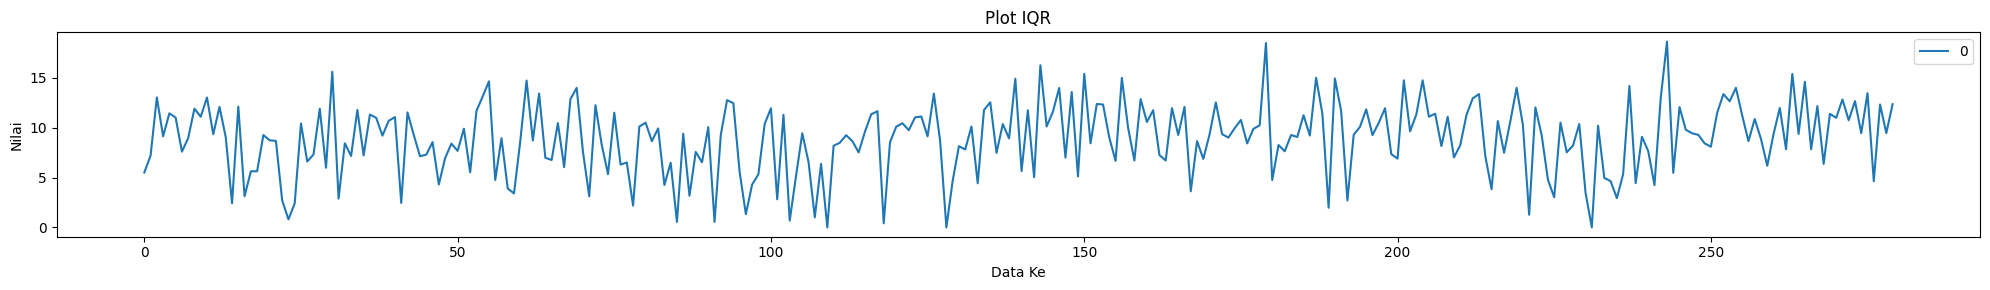

In [ ]:
df_iqr = pd.DataFrame(mfcc_IQR)
df_iqr = df_iqr.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_iqr.plot.line()

plt.title('Plot IQR')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
mfcc_range = []
Range = np.array(MFCC_max) - np.array(mfcc_Min)
mfcc_range.append(Range)

Text(0.5, 0, 'Data Ke')

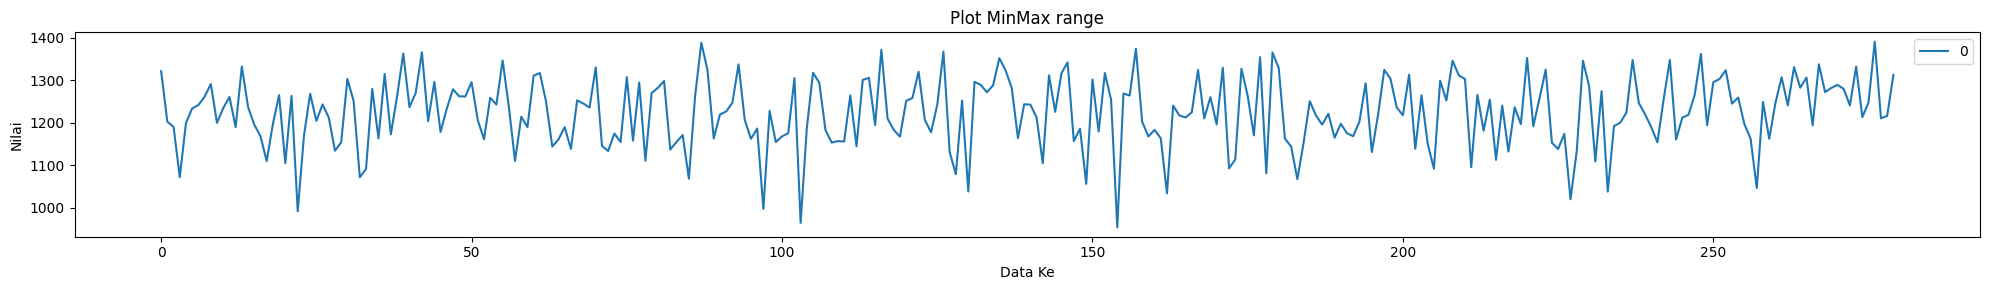

In [ ]:
df_range = pd.DataFrame(mfcc_range)
df_range = df_range.transpose()
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_range.plot.line()

plt.title('Plot MinMax range')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
from scipy.stats import kurtosis

In [ ]:
mfcc_Kurt = []
for i in features_mfcc_test:
  Kurt = kurtosis(i, axis=0, bias=True)
  mfcc_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in mfcc_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

Text(0.5, 0, 'Data Ke')

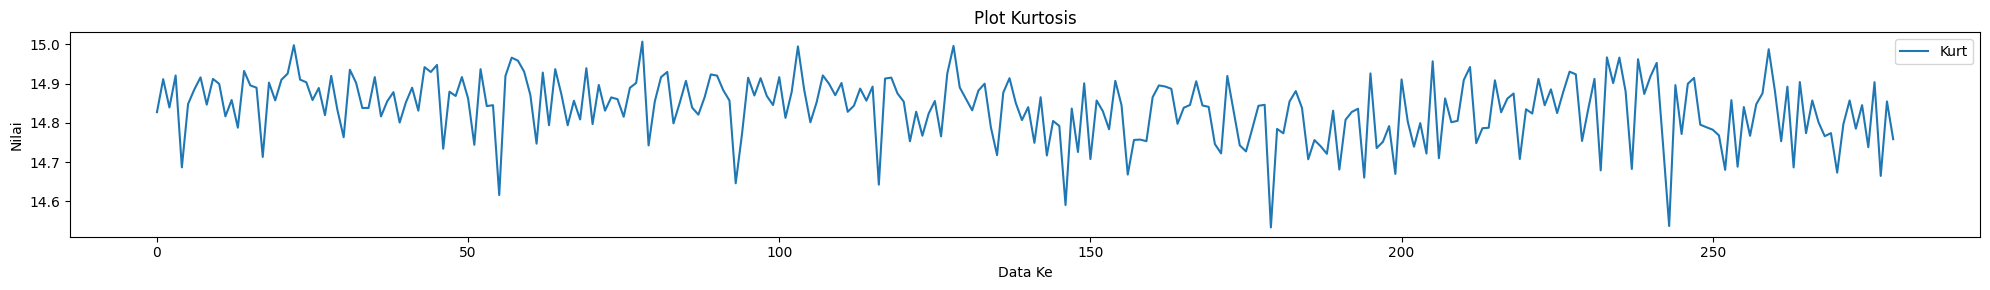

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Kurt'])
plt.rcParams["figure.figsize"] = (20,3)

lines1 = df_kurt.plot.line()

plt.title('Plot Kurtosis')
plt.ylabel('Nilai')
plt.xlabel('Data Ke')

In [ ]:
df_mfcc = pd.DataFrame()
df_mfcc['Mean_mfcc'] = df_mean['Mean']
df_mfcc['Std_mfcc'] = df_std['Std']
df_mfcc['Max_mfcc'] = df_max['Max']
df_mfcc['Min_mfcc'] = df_min['Min']
df_mfcc['Med_mfcc'] = df_med['Med']
df_mfcc['Var_mfcc'] = df_var['Var']
df_mfcc['Skew_mfcc'] = df_skew['Skew']
df_mfcc['Q1_mfcc'] = df_q1['Q1']
df_mfcc['Q3_mfcc'] = df_q3['Q3']
df_mfcc['IQR_mfcc'] = df_iqr[0]
df_mfcc['MinMax_mfcc'] = df_range[0]
df_mfcc['Kurt_mfcc'] = df_kurt['Kurt']
df_mfcc

,Mean_mfcc,Std_mfcc,Max_mfcc,Min_mfcc,Med_mfcc,Var_mfcc,Skew_mfcc,Q1_mfcc,Q3_mfcc,IQR_mfcc,MinMax_mfcc,Kurt_mfcc
0,-48.981632,239.735565,202.148148,-1119.360840,0.000000,57473.144531,-4.083991,-0.030342,5.468998,5.499341,1321.509033,14.827144
1,-45.290043,226.406052,153.913055,-1048.604126,0.000000,51259.699219,-4.101421,0.000000,7.191274,7.191274,1202.517212,14.911211
2,-40.691204,218.828766,171.807343,-1019.073547,2.255058,47886.027344,-4.087075,0.000000,13.019967,13.019967,1190.880859,14.839055
3,-39.477356,206.104675,118.305206,-953.928955,0.315327,42479.136719,-4.103584,0.000000,9.121133,9.121133,1072.234131,14.920605
4,-41.954914,211.825989,202.164413,-997.421387,0.000000,44870.250000,-4.055674,-2.708147,8.719538,11.427685,1199.585815,14.686587
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-42.938381,225.724838,187.779327,-1060.257324,0.166365,50951.703125,-4.066482,-2.523454,10.922972,13.446426,1248.036621,14.738029
276,-50.174992,243.286057,266.701630,-1124.383179,0.000000,59188.105469,-4.097396,0.000000,4.631042,4.631042,1391.084839,14.903465
277,-40.708973,212.339142,209.923157,-1000.776001,0.076779,45087.910156,-4.050197,-1.776793,10.533521,12.310314,1210.699219,14.664721
278,-41.788986,221.505280,188.733826,-1027.590576,0.389086,49064.585938,-4.090141,0.000000,9.448184,9.448184,1216.324463,14.854414


In [ ]:
df_mfcc.to_csv("MFCC_Feature Extraction_N.csv")

In [ ]:
from scipy.stats import entropy
def shannonenergycount(file_path):
    x,sample_rate = librosa.load(file_path, res_type='kaiser_best')
    x_series = pd.Series(x)
    counts = x_series.value_counts()
    entropy_shanon = entropy(counts)
    return entropy_shanon


In [ ]:
shanonenergy = []
shanonpath = Preprocess_N
for audio in os.listdir(shanonpath):
    audio_path = shanonpath+audio
    results = shannonenergycount(audio_path)
    shanonenergy.append(results)

In [ ]:
shanonenergy

[13.400762657764792,
 13.399984882015668,
 13.400381243443215,
 13.40029322475362,
 13.400412678689499,
 13.400399827266614,
 13.399993264748012,
 13.400344034825789,
 13.400516671841293,
 13.399899750011645,
 13.400119283057515,
 13.400184762911286,
 13.400414774372583,
 13.400917738313126,
 13.399458351883068,
 13.400406391640242,
 13.39993826330967,
 13.400320982311849,
 13.400089152491834,
 13.40027985965262,
 13.400059812928633,
 13.400532132625377,
 13.400636125777172,
 13.399132730002318,
 13.40013157983166,
 13.399832688152905,
 13.400121892418717,
 13.4004286531517,
 13.400252615772509,
 13.400297929797906,
 13.400439131567126,
 13.399946646042013,
 13.400147831618229,
 13.400893894796699,
 13.400696900586654,
 13.399999829121636,
 13.400585829383118,
 13.40022038952374,
 13.400590020749288,
 13.400764753447879,
 13.400075273712718,
 13.399672111557798,
 13.400779423229476,
 13.399916515476328,
 13.40037914776013,
 13.400186344916255,
 13.400619360312488,
 13.400791206325506,


In [ ]:
shanonlist = shanonenergy
df_shanon = pd.DataFrame([shanonlist])
df_shanon

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,13.400763,13.399985,13.400381,13.400293,13.400413,13.4004,13.399993,13.400344,13.400517,13.3999,...,13.400047,13.400317,13.400453,13.400521,13.400362,13.400386,13.400626,13.400406,13.400155,13.4004


In [ ]:
df_shanon_transposed = df_shanon.transpose()
df_shanon_transposed

,0
0,13.400763
1,13.399985
2,13.400381
3,13.400293
4,13.400413
...,...
275,13.400386
276,13.400626
277,13.400406
278,13.400155


In [ ]:
df_shanon_transposed.rename(columns={0: "Entropy"}, inplace=True)

In [ ]:
df_shanon_transposed.to_csv("Shannon_Feature Extraction_N.csv")

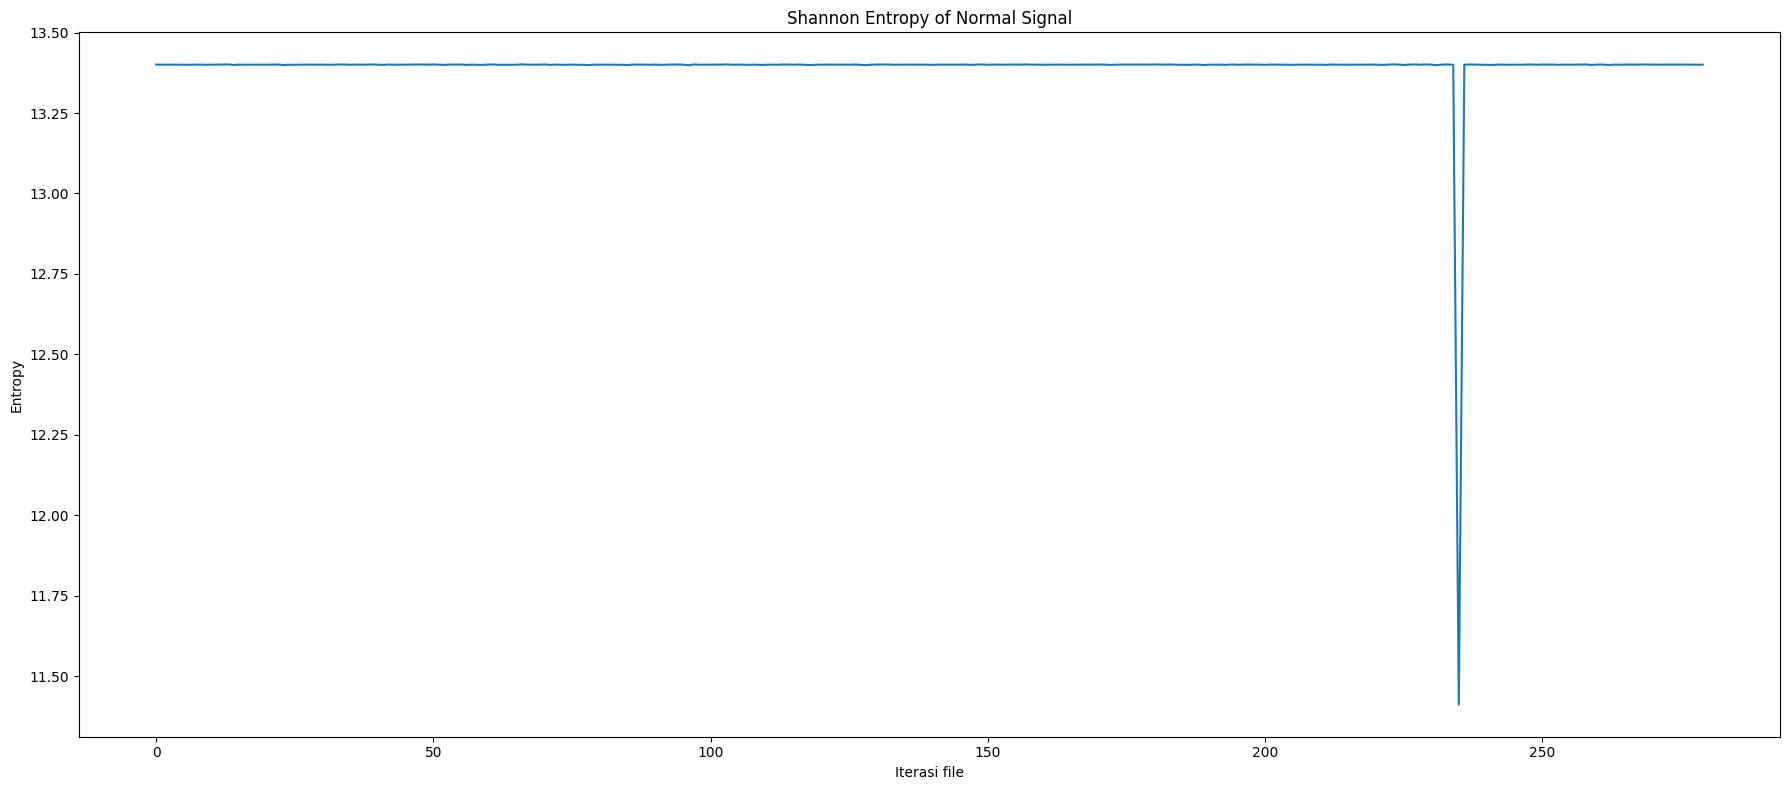

In [ ]:
plt.figure(figsize=(18, 8))
plt.title("Shannon Entropy of Normal Signal")
plt.plot(df_shanon_transposed)
plt.ylabel('Entropy')
plt.xlabel('Iterasi file')
plt.show()